
Importing libraries.

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importing the data from a csv file into a pandas dataframe.

In [43]:
bodyfat = pd.read_csv('bodyfat.csv')

Taking a look at the dataset.

In [44]:
# Move 'BodyFat' column to the end
columns = list(bodyfat.columns)
columns.append(columns.pop(columns.index('BodyFat')))
bodyfat = bodyfat[columns]
bodyfat.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [45]:
# Check for missing values
print(bodyfat.isnull().sum())

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
BodyFat    0
dtype: int64


Generating correlation matrix.

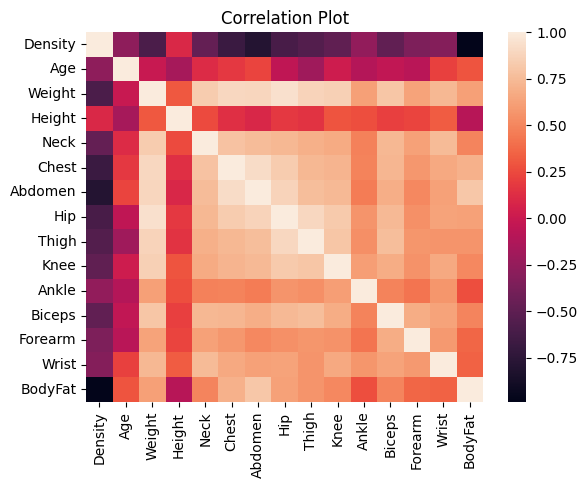

In [46]:
sns.heatmap(bodyfat.corr())
plt.title('Correlation Plot')
plt.show()

Text(0.5, 1.0, 'Scatter Plot: Abdomen vs. BodyFat')

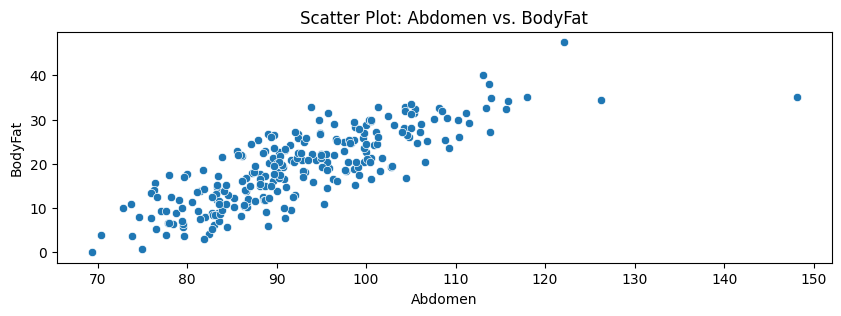

In [47]:
# Scatter plot: Abdomen vs. BodyFat
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Abdomen', y='BodyFat', data=bodyfat)
plt.title('Scatter Plot: Abdomen vs. BodyFat')

Text(0, 0.5, 'Frequency')

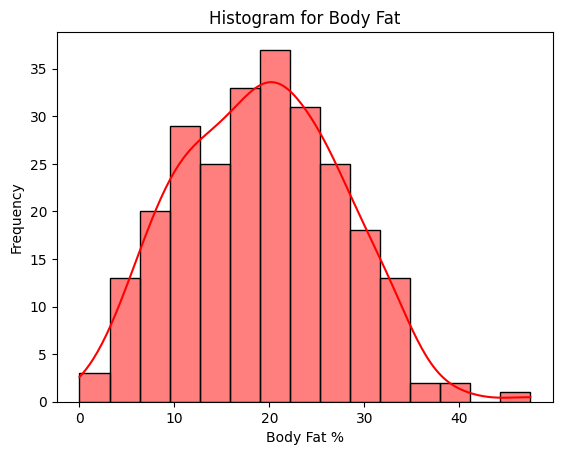

In [48]:
sns.histplot(bodyfat['BodyFat'], bins=15, kde=True, color='red')
plt.title('Histogram for Body Fat')
plt.xlabel('Body Fat %')
plt.ylabel('Frequency')

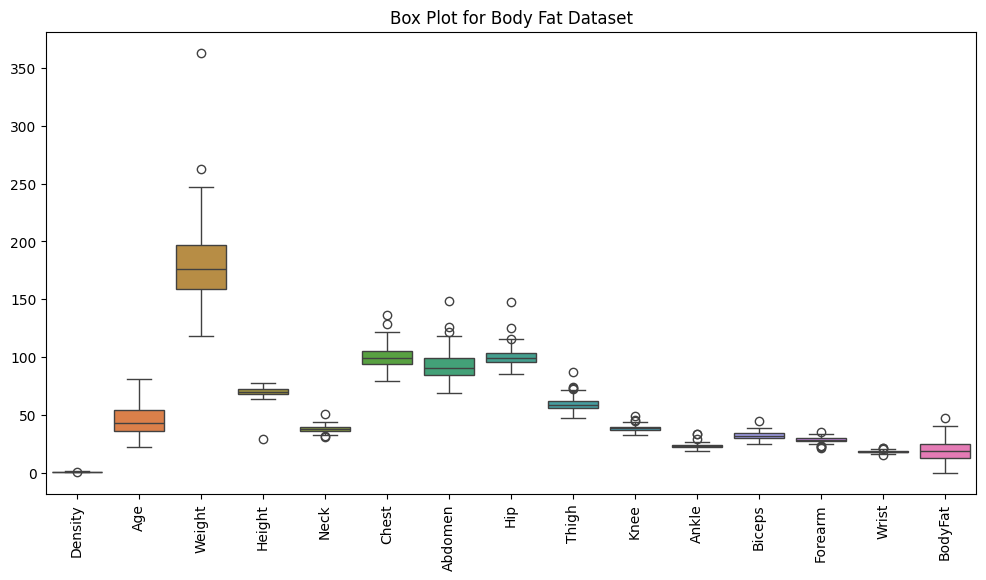

In [49]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=bodyfat)
plt.title('Box Plot for Body Fat Dataset')
plt.xticks(rotation=90)
plt.show()

In [50]:
# Assign 'BodyFat' to 'y' and drop 'Yield' from the dataframe
y = bodyfat['BodyFat'].values
X = bodyfat.drop('BodyFat', axis=1)

X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Splitting the dataset into training and test sets in the ratio 70/30.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

Creating the LR model and fit on the training data.

In [52]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Making Predictions on the test data.

In [53]:
y_pred = LR.predict(X_test)

Calculate the Coefficients.

In [54]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [-4.13559836e+02  1.17559238e-02  1.56993239e-02 -5.70786901e-03
 -5.29098052e-02  3.21572809e-02  6.61357746e-03  1.02674854e-02
 -3.36706378e-02  4.34107610e-02 -1.17009319e-01 -8.03495299e-02
  5.25608678e-02  1.24181538e-01]


Calculating the intercept.

In [55]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 451.7912296596858


Calculating R Squared.

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.9801578769542478


Calculating Mean Squared Error.

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1.4370381076601848


Calculating Root Mean Squared Error.

In [58]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.1987652429313191


Calculating Mean Absolute Error.

In [59]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 0.5518858480820575


Since 'Density' is found through underwater weighing, this may be difficult for users to determine. Thus a two-part prediction model might be necessary, first by predicting density, which helps increase the accuracy of the model to predict bodyfat percentage.

In [60]:
import pickle

with open('bodyfat_model_1.pkl', 'wb') as f:
    pickle.dump(LR, f)